In [1]:
print("Hello World!!!")

Hello World!!!


In [47]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing/"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

#where to save figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = "images"
CHAPTER_ID = "end_to_end_project"

def save_fig(image_id, tight_layout=True, extension="png", resolution=300):
    images_dir = os.path.join(IMAGES_PATH, CHAPTER_ID)
    if not os.path.isdir(images_dir):
        os.makedirs(images_dir)
    path = os.path.join(images_dir, image_id + "." + extension)
    if tight_layout:
        plt.tight_layout()
    print("Saving image: ", image_id, " to ", path)
    plt.savefig(path, format=extension, dpi=resolution)

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


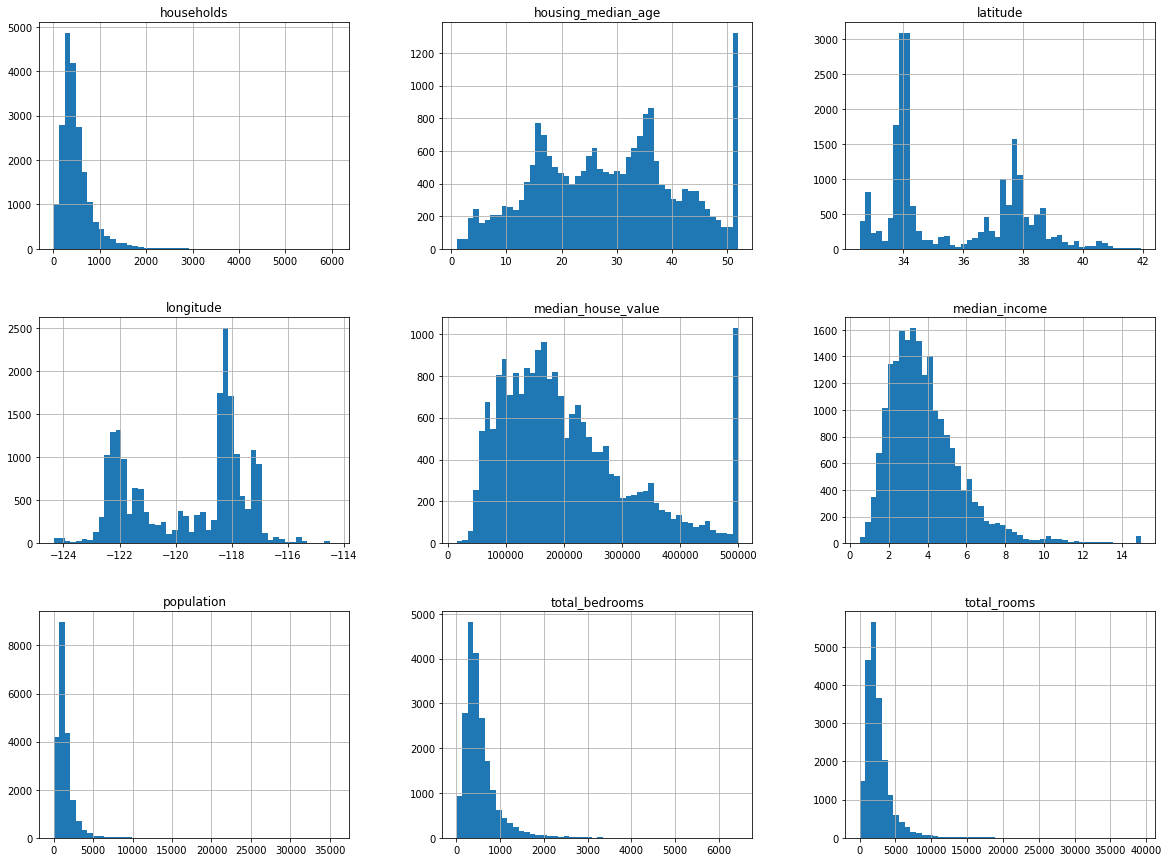

In [9]:
#only in Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
np.random.seed(42)
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set)," train +", len(test_set), "test")

16512  train + 4128 test


In [12]:
print("result", len(np.random.permutation(len(housing))[11:20]))

result 9


In [13]:
'''
The train_set and test_set will produce different data during each runs.
Overtime the algorithm would see all of the data. This should be avoided.

One solution is to save the test set on the first run and use it in subsequent runs

Another option is set the seed value for random generators by calling
np.random.seed(42)
    
before calling
    np.random.permutation()
doing so it will generate same shuffled indices

But both solutions will fail next time you fetch an updated data set

Another common soultion would be to use an unique identifier of each instance to decide whether that would go
into the training set.

'''
import hashlib

def test_set_check(identifier, test_ratio, hash_method):
    hashed_identifier = hash_method(np.int64(identifier)).digest()        
    return bytearray(hashed_identifier)[-1] < 256 * test_ratio    

def split_train_test_by_id(data, test_ratio, id_column, hash_method=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash_method))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [14]:
# the housing data set doesn't have an unique identifier column, let's generate one
housing_with_id = housing.reset_index() # adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [15]:
'''
if row index is used as an unique identifier then we have to make sure new data set is always
appended to the end of the list and no row is ever deleted.

since this is not possible, we can generate unique id based on existing data.
'''
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [16]:
# the method "split_train_test" we wrote earlier is also available from Scikit-Learn.
# here setting random_state is equivalent to setting random seed earlier
from sklearn.model_selection import train_test_split
train_set, test_test = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
# test set must be representative of full data.
# example, if US population composed of 51.3% of female and 48.7% of male
# then test set must must maintain ratio of 513 female and 487 male
# this is called "stratified sampling"
# then this data is divided into homogeneous subgroups called "strata"
# in stratum every strata must have sufficient samples meaning not so large or not so small rather
# it should be large enough
# data in each strata must be representative of actual data

# Suppose we see median_income as such an important parameter to calculate median housing prices
# then we will have to ensure that test set is representative of whole data set based on various categories of
# median income.
# for that we need to calculate income category based on median income
# while calculating the categories we should not be left with too many categories
# so we are deviding the median_income by 1.5 to minimze the categories and rounding up using ceil
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [18]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [19]:
# let's see the proportion of each housing category in the whole data set
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)
income_cat_proportions(housing) * 100

3.0    35.058140
2.0    31.884690
4.0    17.630814
5.0    11.443798
1.0     3.982558
Name: income_cat, dtype: float64

In [20]:
# Let's generate new test, train data using stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strata_train_set = housing.loc[train_index]
    strata_test_set = housing.loc[test_index]

In [21]:
# let's measure the proportions of income_cat in the test set
income_cat_proportions(strata_test_set) * 100

3.0    35.053295
2.0    31.879845
4.0    17.635659
5.0    11.458333
1.0     3.972868
Name: income_cat, dtype: float64

In [22]:
# as wee the strata samples income category proportions are almost similar to that of what was acquired from
# full data set.
# thanks to stratified sampling

# how about the proportions in test set generated using random sampling
train_set, test_set = split_train_test(housing, 0.2)
income_cat_proportions(test_set) * 100

## As you see the test set from random sampling is more diversed than that of statified sampling's

3.0    34.617248
2.0    32.388566
4.0    17.369186
5.0    11.676357
1.0     3.948643
Name: income_cat, dtype: float64

In [23]:
# Let's calculate and compare error percentage of Overall's, Random's and Stratified's
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Random": income_cat_proportions(test_set),
    "Stratified": income_cat_proportions(strata_test_set),
})
compare_props["Random Error %"] = 100*(compare_props["Random"]/compare_props["Overall"])-100
compare_props["Stratified Error %"] = 100*(compare_props["Stratified"]/compare_props["Overall"])-100

compare_props
#samples obtained using stratified samples has almost negligible errors

,Overall,Random,Stratified,Random Error %,Stratified Error %
3.0,0.350581,0.346172,0.350533,-1.257601,-0.013820
2.0,0.318847,0.323886,0.318798,1.580307,-0.015195
4.0,0.176308,0.173692,0.176357,-1.483924,0.027480
5.0,0.114438,0.116764,0.114583,2.032176,0.127011
1.0,0.039826,0.039486,0.039729,-0.851582,-0.243309


In [24]:
# let's remove the income_cat from the obtained data to restore to its orginal state
for set_ in (strata_train_set, strata_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [25]:
# so far we have taken a quick glance at the data set to understand the various features of it
# The next goal is to go in-depth.
# before that we will keep the test_set aside and only explore train_set
# to make sure we don't harm the actual train_set we will make a copy of it

housing = strata_train_set.copy()

Saving image:  bad_visualization_plot  to  images/end_to_end_project/bad_visualization_plot.png


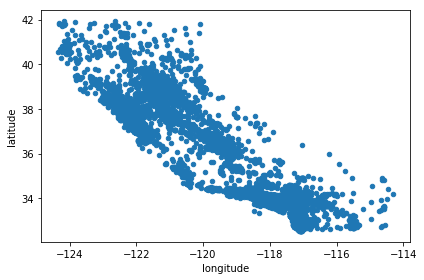

In [48]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")
# the below plot looks like the map of California

Saving image:  better_visualization_plot  to  images/end_to_end_project/better_visualization_plot.png


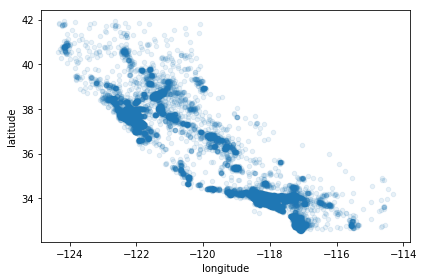

In [49]:
# to visualize the place that high density of data points we will set alpha to 0.1
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving image:  housing_prices_scatterplot  to  images/end_to_end_project/housing_prices_scatterplot.png


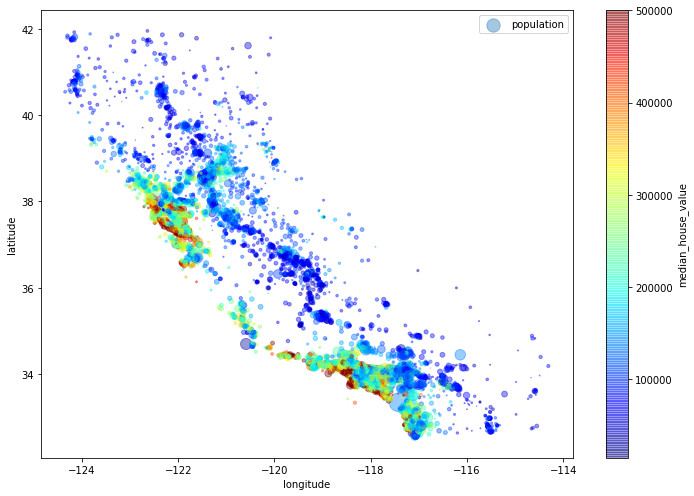

In [62]:
#what about housing prices
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()


save_fig("housing_prices_scatterplot")

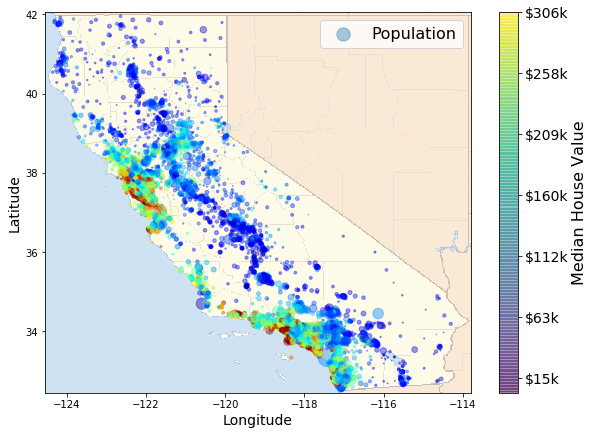

In [70]:
#Let's place above california map to have better understanding of data
import matplotlib.image as mpimg
california_img = mpimg.imread(PROJECT_ROOT_DIR + "/images/end_to_end_project/california.png")
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="Population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False, sharex=False)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
plt.show()




In [71]:
# based on the plot above, the median house value has relationships with
# 1. Population density
# 2. Location (like ocean proximity)

# Let's see how each values are correlated with each other

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# The table below shows how the values of different columns are related
# If the Standard Correlation Coefficient is close to 1, then the median house value tends
# to increase when the parameter's value increases
# If the Standard Correlation Coefficient is close to -1, then the median house value tends
# to decrease when the parameter's value increases

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Saving image:  scatter_matrix_plot  to  images/end_to_end_project/scatter_matrix_plot.png


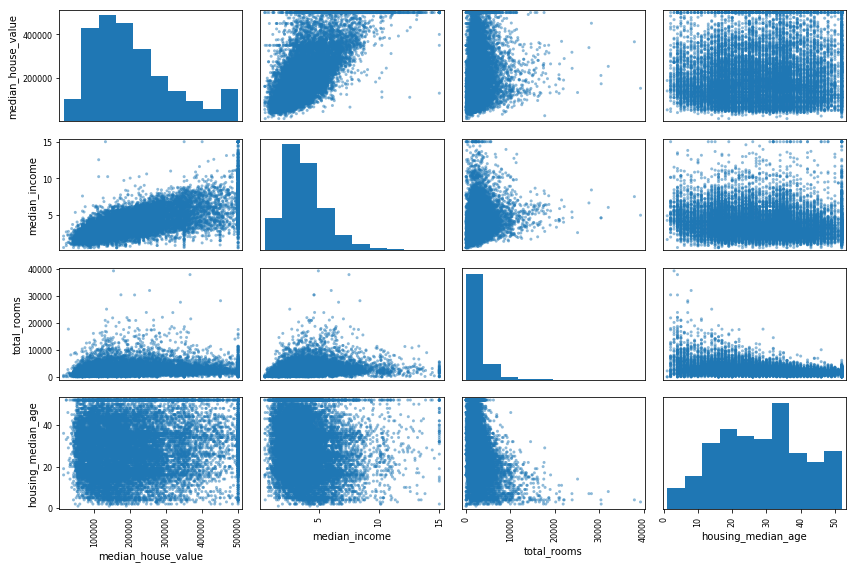

In [78]:
# We can also use panda's scatter_matrix function to see the correlation between variables
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income","total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
save_fig("scatter_matrix_plot")

Saving image:  income_vs_house_value_plot  to  images/end_to_end_project/income_vs_house_value_plot.png


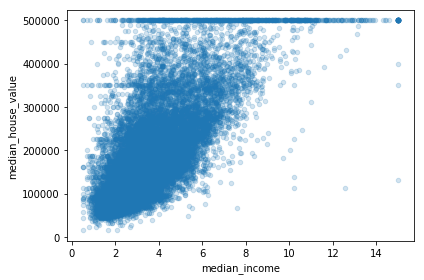

In [82]:
# As from the above plots, we see there's a strong correlation between median_income
# and median_house_value attributes
# Let's separate that plot alone
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)
save_fig("income_vs_house_value_plot")

In [88]:
# Let's experiment with few attribute combinations like
# 1. rooms per household
# 2. bedrooms per room
# 3. population per household

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

# correaltion between median house value and newly calculation attributes
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64